In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio


In [9]:
dataset = pd.read_csv('../../data/processed/fraud_dataset_processed.csv')
dataset[['score', 'fraude']]

,score,fraude
0,0.6600,0
1,0.7200,0
2,0.9500,0
3,0.0200,0
4,0.7600,1
...,...,...
249995,0.5201,0
249996,0.0695,0
249997,0.6723,0
249998,0.6377,0


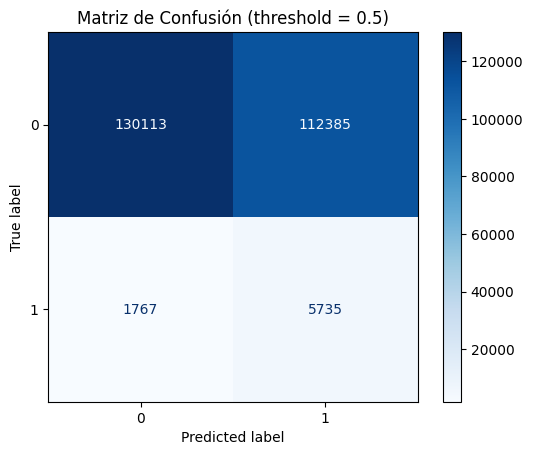

Costo total con FP=5 y FN=200 para threshold=0.5: 915325
Costo cada mil casos (threshold=0.5): 3661.30


In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calcular las predicciones con treshold 0.5
y_true = dataset['fraude']
y_pred = (dataset['score'] >= 0.5).astype(int)

# Calcular la matriz de confusión
cm = confusion_matrix(y_true, y_pred)

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión (threshold = 0.5)')
plt.show()

# Calcular el costo total con FP=5 y FN=200
fp = cm[0,1]
fn = cm[1,0]
cost_fp = 5
cost_fn = 200
total_cost = fp * cost_fp + fn * cost_fn
print(f"Costo total con FP={cost_fp} y FN={cost_fn} para threshold=0.5: {total_cost}")
# Calcular el costo cada mil casos evaluados para el threshold=0.5
cost_per_thousand = total_cost / len(dataset) * 1000
print(f"Costo cada mil casos (threshold=0.5): {cost_per_thousand:.2f}")


Threshold óptimo para costo mínimo: 0.710
Costo mínimo: 774635
Costo por 1000 registros: 3098.54
FP: 59807, FN: 2378 en threshold óptimo


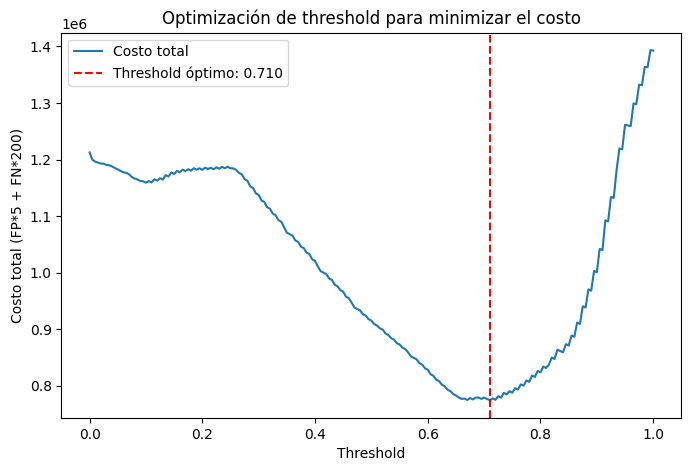

In [15]:
# Queremos buscar el threshold que minimiza el costo total (FP*5 + FN*200)
thresholds = np.linspace(0, 1, 201)  # Thresholds de 0 a 1 en pasos de 0.005
costs = []
fps = []
fns = []

for thresh in thresholds:
    y_pred_t = (dataset['score'] >= thresh).astype(int)
    cm_t = confusion_matrix(y_true, y_pred_t)
    fp_t = cm_t[0,1]
    fn_t = cm_t[1,0]
    total_cost_t = fp_t * cost_fp + fn_t * cost_fn
    costs.append(total_cost_t)
    fps.append(fp_t)
    fns.append(fn_t)

min_cost_idx = np.argmin(costs)
min_cost_threshold = thresholds[min_cost_idx]
min_cost = costs[min_cost_idx]

print(f"Threshold óptimo para costo mínimo: {min_cost_threshold:.3f}")
print(f"Costo mínimo: {min_cost}")
print(f"Costo por 1000 registros: {min_cost / len(dataset) * 1000:.2f}")
print(f"FP: {fps[min_cost_idx]}, FN: {fns[min_cost_idx]} en threshold óptimo")

# Graficar costos vs threshold
plt.figure(figsize=(8,5))
plt.plot(thresholds, costs, label='Costo total')
plt.axvline(min_cost_threshold, color='red', linestyle='--', label=f'Threshold óptimo: {min_cost_threshold:.3f}')
plt.xlabel('Threshold')
plt.ylabel('Costo total (FP*5 + FN*200)')
plt.title('Optimización de threshold para minimizar el costo')
plt.legend()
plt.show()

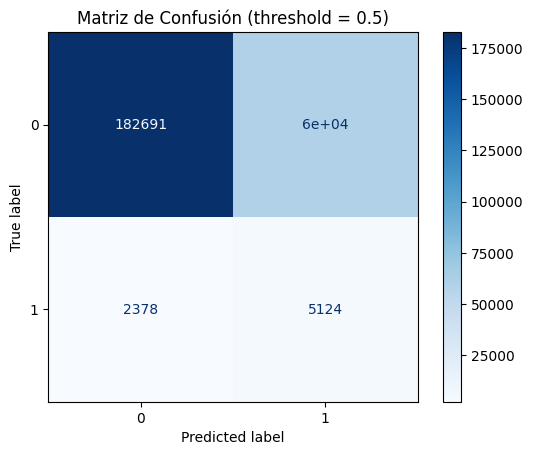

Costo total con FP=5 y FN=200 para threshold=0.5: 774635


In [13]:
# Calcular las predicciones con treshold 0.5
y_true = dataset['fraude']
y_pred = (dataset['score'] >= 0.710).astype(int)

# Calcular la matriz de confusión
cm = confusion_matrix(y_true, y_pred)

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión (threshold = 0.5)')
plt.show()

# Calcular el costo total con FP=5 y FN=200
fp = cm[0,1]
fn = cm[1,0]
cost_fp = 5
cost_fn = 200
total_cost = fp * cost_fp + fn * cost_fn
print(f"Costo total con FP={cost_fp} y FN={cost_fn} para threshold=0.5: {total_cost}")